# 6.6 Sourcing & Analyzing Time Series Data

In [1]:
## 1. Importing libraries and data
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore") 
# Disable deprecation warnings that could indicate, for instance, a suspended library or feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') 
# This is a styling option for how the plots will appear.
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'j7mMvHFG-r4NZbQTxikj'

In [3]:
path = r'C:\Users\turne\Chocolate Rating'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, 'Clean Data','Chocolate_clean.csv'), index_col = False)

In [5]:
df.shape

(1795, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1795 non-null   int64  
 1   Company Name      1795 non-null   object 
 2   Bar Name          1795 non-null   object 
 3   REF               1795 non-null   int64  
 4   Review Date       1795 non-null   int64  
 5   Cacao Percent     1795 non-null   float64
 6   Company Location  1795 non-null   object 
 7   Rating            1795 non-null   float64
 8   Bean Type         1795 non-null   object 
 9   Bean Origin       1795 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 140.4+ KB


In [7]:
# Cleaning, wrangling & subsetting 
df_2 = df.reset_index()

In [8]:
df_2.head()

,index,Unnamed: 0,Company Name,Bar Name,REF,Review Date,Cacao Percent,Company Location,Rating,Bean Type,Bean Origin
0,0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [14]:
# Change data type
df_2['Review Date'] = df_2['Review Date'].astype('str')

In [10]:
# Dropping unneeded columns and creating data subset
df_2 = df.drop(['Unnamed: 0','Company Name', 'Bar Name', 'REF', 'Company Location', 'Bean Type', 'Bean Origin'], axis = 1)

In [15]:
data_sub = df_2.loc[(df_2['Review Date'] >= '2006-01-01') & (df_2['Review Date'] < '2017-12-31')]

In [16]:
df_2.columns

Index(['Review Date', 'Cacao Percent', 'Rating'], dtype='object')

In [17]:
## Avg Rating per Review Date - Review dates were only logged as the year the review was conducted. This helps when creating a subset for a datetime.
avg_rating_per_year = df_2.groupby('Review Date')['Rating'].mean()

In [18]:
avg_rating_per_year

Review Date
2006    3.125000
2007    3.162338
2008    2.994624
2009    3.073171
2010    3.148649
2011    3.256061
2012    3.178205
2013    3.197011
2014    3.189271
2015    3.246491
2016    3.226027
2017    3.312500
Name: Rating, dtype: float64

In [19]:
## Avg Cacao Percent per Review Date - Referring to the average Cacao Percent from each year.
avg_cacao_per_year = df_2.groupby('Review Date')['Cacao Percent'].mean()

In [20]:
avg_cacao_per_year

Review Date
2006    0.710000
2007    0.720390
2008    0.726989
2009    0.704472
2010    0.707838
2011    0.709697
2012    0.715282
2013    0.722663
2014    0.722632
2015    0.720140
2016    0.717580
2017    0.715417
Name: Cacao Percent, dtype: float64

In [21]:
# Set the "Date" column as the index

from datetime import datetime

df_2['datetime'] = pd.to_datetime(df_2['Review Date']) # Create a datetime column from "Date.
df_2 = df_2.set_index('datetime') # Set the datetime as the index of the dataframe.
df_2.drop(['Review Date'], axis=1, inplace=True) # Drop the "Date" column.
df_2.head()

,Cacao Percent,Rating
datetime,,
2016-01-01,0.63,3.75
2015-01-01,0.70,2.75
2015-01-01,0.70,3.00
2015-01-01,0.70,3.50
2015-01-01,0.70,3.50


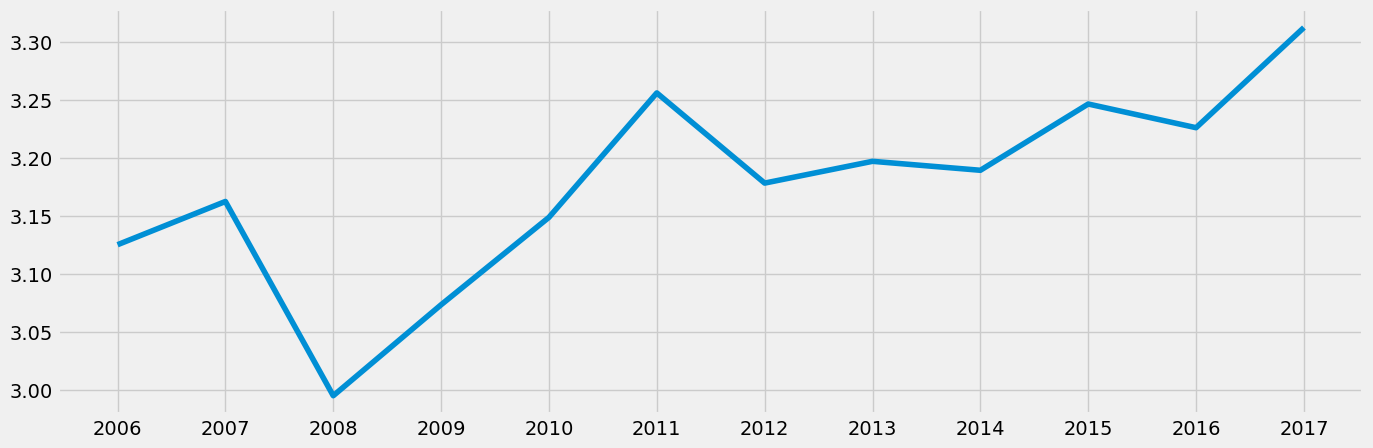

In [22]:
# Plot the new data set for Avg Rating per Year

plt.figure(figsize=(15,5), dpi=100)
plt.plot(avg_rating_per_year)

## According to the Line Chart, it is a Stationary Time Series. There is no way to determine seasonality or noise, but we can clearly see that the Ratings are on an upward trend. This tells me that the quality of chocolate must be improving.

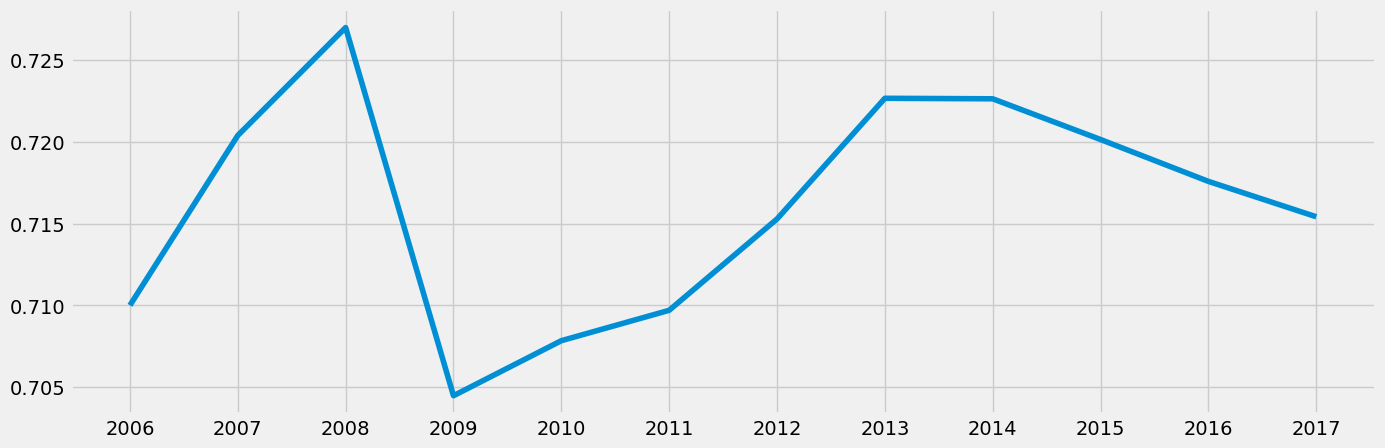

In [24]:
# Plot the new data set for Avg Cacao Percent per Year

plt.figure(figsize=(15,5), dpi=100)
plt.plot(avg_cacao_per_year)

## This is a stationary time series as well. Based on averages, there is fluctuation in the cycle of Cacao Percent. This chart tells me that the average Cacao Percent rises and falls and the average Cacao Percent is roughly 71%.

In [25]:
# Check for missing values (you shouldn't have any)

avg_cacao_per_year.isnull().sum()

0

In [26]:
# Reset index so that you can use the "Review Date" column as a filter

df_origin = df_2.reset_index()

In [27]:
df_origin

,datetime,Cacao Percent,Rating
0,2016-01-01,0.63,3.75
1,2015-01-01,0.70,2.75
2,2015-01-01,0.70,3.00
3,2015-01-01,0.70,3.50
4,2015-01-01,0.70,3.50
...,...,...,...
1790,2011-01-01,0.70,3.75
1791,2011-01-01,0.65,3.00
1792,2011-01-01,0.65,3.50
1793,2011-01-01,0.62,3.25


In [28]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       1795 non-null   datetime64[ns]
 1   Cacao Percent  1795 non-null   float64       
 2   Rating         1795 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 42.2 KB


In [29]:
time_series = df_origin['Rating']

In [30]:
df_origin.set_index('datetime', inplace=True)

In [31]:
# Perform seasonal decompose in a list comprehension on each column, return dataframe
def season_decom(df, model='additive'):
    return pd.concat([pd.DataFrame({col: sm.tsa.seasonal.seasonal_decompose(df[col], model=model).trend}) for col in df.columns], axis=1)

In [32]:
# Import Seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
# Decompose time series using an additive 
# apply seasonal_decompose to each column with .apply

df_seasonal = df_origin.apply(lambda x: seasonal_decompose(x, model='additive', period=12).trend)

In [34]:
# Define fixed size for all charts
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

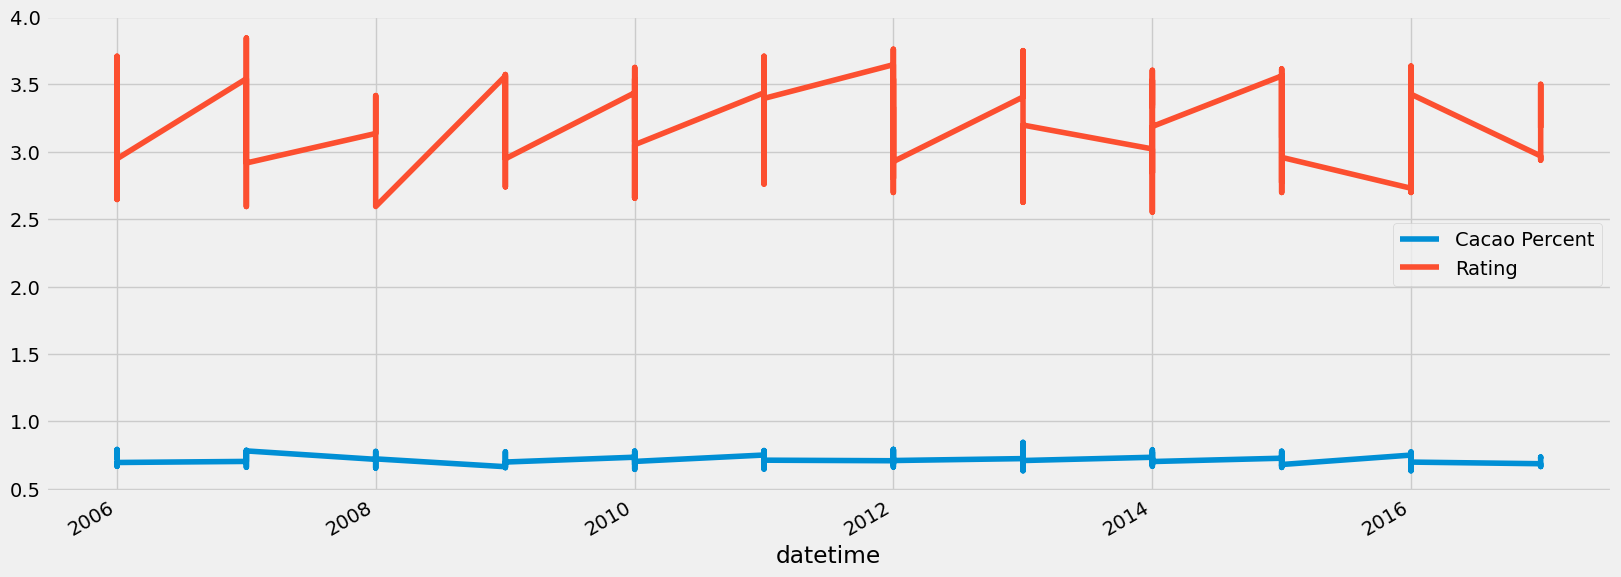

In [35]:
# Plot separate components

df_seasonal.plot()
plt.show()

## Results- Based on these results, I think because there is no consistent time period of observations, I believe the decomposition only confirmed the averages for the Ratings. Because of this decomposition test, there is no certainty for trends or seasonality. The approximation for cacao Ratings within each year shows a cycle of averages, not really inclines or declines.

 # Conduct a Dickey-Fuller test to check for stationarity

In [37]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

In [42]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return an array of numbers. This is why you need to also define a function that prints the correct output from that array.\n",

from statsmodels.tsa.stattools import adfuller 
    
def dickey_fuller(timeseries): # Define the function,   
    
  # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
     result['Critical Value (%s)'%key] = value
     print (result)
# Apply the test using the function on the time series

dickey_fuller(df_origin['Cacao Percent']) 

Dickey-Fuller Stationarity test:
Test Statistic                -1.737095e+01
p-value                        5.138158e-30
Number of Lags Used            3.000000e+00
Number of Observations Used    1.791000e+03
Critical Value (1%)           -3.434006e+00
dtype: float64
Test Statistic                -1.737095e+01
p-value                        5.138158e-30
Number of Lags Used            3.000000e+00
Number of Observations Used    1.791000e+03
Critical Value (1%)           -3.434006e+00
Critical Value (5%)           -2.863155e+00
dtype: float64
Test Statistic                -1.737095e+01
p-value                        5.138158e-30
Number of Lags Used            3.000000e+00
Number of Observations Used    1.791000e+03
Critical Value (1%)           -3.434006e+00
Critical Value (5%)           -2.863155e+00
Critical Value (10%)          -2.567630e+00
dtype: float64


## Observations- To disprove the null = no unit root = stationary data = can proceed with forecast
## The test statistic is smaller than critical value = can reject null hypothesis.  
Test Statistic is -17
My p-value is close to 0 (0.05), that the data is significant.
## Which means my data is stationary.

In [65]:
# Dropping unneeded columns and creating data subset- testing Cacao Percent
df_origin = df.drop(['Unnamed: 0','Company Name', 'Bar Name', 'REF', 'Review Date', 'Company Location', 'Bean Type', 'Bean Origin','Rating',], axis = 1)

In [66]:
df_origin

,Cacao Percent
0,0.63
1,0.70
2,0.70
3,0.70
4,0.70
...,...
1790,0.70
1791,0.65
1792,0.65
1793,0.62


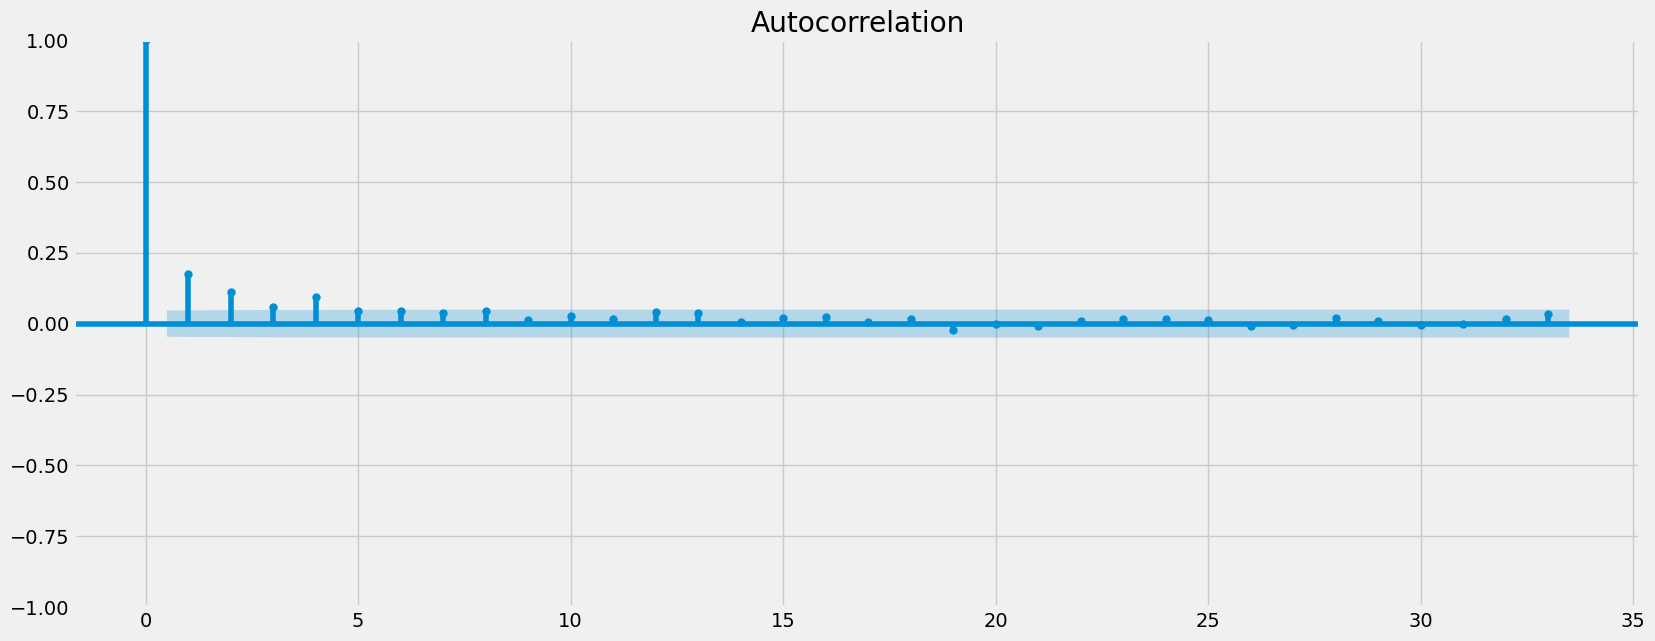

In [61]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
# Here, you import the autocorrelation and partial correlation plots

plot_acf(df_origin)
plt.show()

## Evaluation- The vertical lines represent the lags in the series, while the blue area represents the confidence interval.  I can deduce that the autocorrelation is well within the confidence level.  This data is stationary.